# Seguimiento espectroscópico de candidatos a binarias eclipsantes

---

**1)** La importancia de las *binarias eclipsantes* en astronomía es que gracias a su funcionamiento como sistema de 2 estrellas orbitando a un centro de masa, se puede corroborar la información acerca de estructura y evolución estelar.
Gracias a estos sistemas se puede calcular con gran exactitud el valor de sus masa, esto es así gracias a que se puede ocupar las leyes de kepler debido a sus orbitas. Además, como son eclipsantes gracias al transito que hay entre ellas es posible encontrar la razón de sus radios. También es posible encontrar el espectro de ambas al momento de tránsito de una sobre otra.

Fuentes:
> https://es.wikipedia.org/wiki/Estrella_binaria


**2)** Un espectrografo *Echelle* utiliza, en vez de un prisma, una red de disfracción con ranuras muy pequeñas, permitiendo una mayor difracción de la luz por lo que la resolución de éste es más alto que el de un espectrógrafo con prisma, además gracias a las pequeñas rendijas de disfracción, cada componente de la luz incidente se separa y se ordena en distintas lineas, dependiendo de la longitud de onda de esta componente. La utilidad que tiene este tipo de espectrografos en binarias, es que permite medir velocidades bajas debido a su alta resolución, por lo que se haría más fácil detectar el espectro de estas estrellas.

Fuentes:
>https://es.wikipedia.org/wiki/Red_de_difracci%C3%B3n

>http://www.astromia.com/fotohistoria/echelle.htm

**3)** Antes de pasar los datos por un algoritmo, las curvas de luz se limpiaron de efectos provocados por Mercurio y Venus pasando por el campo visual. Luego, para determinar candidatos, se analizó la curva de luz en distintas etapas, construyendo un modelo de curva de luz, encontrando
el mejor ajuste de mínimos cuadrados de la curva modelo a la curva real. La curva modelo tiene los mismos tiempos y errores que 
la curva de luz real y se hace lo siguiente:

- Se determina el periodo que se ajuste mejor, usando una forma sinusoidal.
- Se afina la determinación del periodo, ya que sino el resto del proceso se verá afectado gravemente. 
- Se determina la amplitud de la variabilidad antes y después de determinar la forma que mejor se ajusta.
- Determinar la forma de la variabilidad, que consisten en formas sinusoidales con distintas señales armónicas sobrepuestas. Se vuelve a calcular la amplitud después de esto, y si se encontró un modelo eclipsante que se ajusta bien, se calculan también la duración y la profundidad de los eclipses. 
- Si la mejor amplitud es cero, el modelo encontró que la estrella es constante. Si no es cero, hay que chequear la excentricidad y la amplitud del eclipse secundario. 


Luego de tener una lista inicial de candidatos, las estrellas en la vecindad de los candidatos a EB de baja masa fueron revisadas para evaluar si es que había contaminación de alguna EB conocida y brillante, lo cual descarta muchos candidatos. 

Otras configuraciones que generan falsos positivos, es que estamos buscando estrellas binarias eclipsantes, y no planetas que generen eclipses al transitar delante de su estrella, lo que genera una curva de luz similar a la de estrellas binarias; como se menciona en la parte anterior, las estrellas de fondo puden también pueden generar confusión y por lo tanto se descartan; y por otro lado, si la estrella principal es muy caliente comparada con la estrella secundaria, cuando la principal eclipse a la secundaria, puede que no se llegue a notar el eclipse. 

Ahora, de los 9 candidatos a binarias eclipsantes mencionadas en el paper de Wraight et al (2012), corroboré en simbad si efectivamente eran o no eclipsantes.

|     ID      | Ascención Recta(grados) | Declinación(grados) |   Estado del target   |
|:-----------:|:-----------------------:|:-------------------:|:---------------------:|
|   HD23765   |        57.1205          |       21.7975       |       Candidata       |
|   HD287039  |        71.5819          |       12.7448       |       Candidata       |
|   HD89849   |        155.541          |       6.21829       |       Candidata       |
|  BD-07 3648 |        203.727          |      -8.44247       |       Candidata       |
|   HD75767   |        133.068          |       8.06293       |Binaria espectroscópica|
|   HD198044  |        312.091          |      -22.7407       |       Candidata       |
|   HD205403  |        323.766          |      -3.7349        |       Candidata       |
|   HD213597  |        338.136          |       1.58245       |   Binaria Eclipsante  |
|   HD222891  |        356.162          |      -8.84879       |       Candidata       |

En la tabla anterior en la columna *Estado del target* se presenta si están confirmadas las binarias o si aun son candidatas. Concluyo de esto que debo trabajar con los 7 candidatos mostrados en la tabla.


Fuentes:
>https://ui.adsabs.harvard.edu/#abs/2012MNRAS.427.2298W/abstract

>http://simbad.u-strasbg.fr/simbad/sim-fbasic

4) 

In [1]:
import ephem
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

RA = [["57.1205","HD23765"],["71.5819","HD287039"],["155.541","HD89849"],["203.727","BD-07 3648"],["312.091","HD198044"],["323.766","HD205403"],["356.162","HD222891"]]
DEC = [["21.7975","HD23765"],["12.7448","HD287039"],["6.21829","HD89849"],["-8.44247","BD-07 3648"],["-22.7407","HD198044"],["-3.7349","HD205403"],["-8.84879","HD222891"]]

#ingreso coordenadas del observatorio Santa Martina
SantaMartina = ephem.Observer()
SantaMartina.lon =  ephem.degrees('289.4656')
SantaMartina.lat = ephem.degrees('-33.2692')
#SantaMartina.date = '2016/10/31 21:00:00'
SantaMartina.elevation = 1450
star = ephem.FixedBody()
for k in range(7): #Selecciono los candidatos.
    SantaMartina.date = '2016/10/30 20:00:00'
    star._ra = ephem.degrees(RA[k][0])
    star._dec = ephem.degrees(DEC[k][0])
#determino los días en los que voy a observar, que van a ser 9 días ya que los días hábiles serán 3 por semanas durante 3 semanas.
    print "_______",RA[k][1],"_______"
    for i in range(7):
        SantaMartina.date += ephem.hour * 72
        for j in range(4): #voy recorriendo las horas.
            SantaMartina.date += ephem.minute * 60
            star.compute(SantaMartina)
            if star.alt > ephem.degrees('33:00:00'):
                print star.alt, SantaMartina.date    
        SantaMartina.date -= ephem.minute * 60 * 4
    

/home/juanito/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib
_______ HD23765 _______
_______ HD287039 _______
_______ HD89849 _______
_______ BD-07 3648 _______
_______ HD198044 _______
65:21:50.1 2016/11/2 21:00:00
76:04:42.2 2016/11/2 22:00:00
78:36:24.3 2016/11/2 23:00:00
69:36:20.2 2016/11/3 00:00:00
67:40:32.4 2016/11/5 21:00:00
77:36:31.2 2016/11/5 22:00:00
77:24:41.3 2016/11/5 23:00:00
67:20:55.8 2016/11/6 00:00:00
69:55:18.1 2016/11/8 21:00:00
78:44:19.7 2016/11/8 22:00:00
75:50:03.4 2016/11/8 23:00:00
65:01:45.7 2016/11/9 00:00:00
72:04:32.3 2016/11/11 21:00:00
79:20:23.9 2016/11/11 22:00:00
73:59:18.1 2016/11/11 23:00:00
62:39:52.0 2016/11/12 00:00:00
74:05:54.0 2016/11/14 21:00:00
79:19:19.2 2016/11/14 22:00:00
71:57:24.9 2016/11/14 23:00:00
60:15:58.4 2016/11/15 00:00:00
75:55:53.7 2016/11/17 21:00:00
78:41:16.6 2016/11/17 22:00:00
69:47:49.0 2016/11/17 23:00:00
57:50:37.1 2016/11/18 00:00:00
77:29:26.0 2016/11/20 21:00:00
77:31:54.4 2016/11/20 22:00:00
67:32:47.9 2016/11

La altura de cada candidata a binaria eclipsante debe estar por sobre los 33°, esto es así ya que el telescopio no inclinarse a más de 80 grados, además, cerca del horizonte las masas de aires son mayores a 1 por lo que se hace poco recomendable observar a esa altura. 

El programa me arroja solo los candidatos visibles y estos son los siguientes:
- HD 198044
- HD 205403
- HD 222891

Fuentes:

>www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=3&ved=0ahUKEwi6saKSrorQAhWHlZAKHarbAe0QFggoMAI&url=http%3A%2F%2Fstackoverflow.com%2Fquestions%2F6870743%2Fcalculation-star-position-in-the-sky-pyephem&usg=AFQjCNEdWv6zcg7Ck4kFZF1XXt011jKhXg&sig2=f4IhvkO44JHoF3VMviD6aA

>http://rhodesmill.org/pyephem/tutorial.html

In [2]:
def paraaltura(string):
    h=float(string[:2])
    m=float(string[3:5])
    s=float(string[6:])
    tiempo=h+m/60+s/3600
    return tiempo        

In [3]:
def trans(string):
    a=''
    b=0
    i=0
    count=0
    for c in string:
        a=a+c
        if c==':':
            a=a.replace(":", "")
            b=float(a)
            i+=1
            if i==1:
                h=b
                a=''
            if i==2:
                m=b
                a=''
        count+=1
        if count==8:
            s=float(a)
    transform=h+m/60+s/3600
    return transform

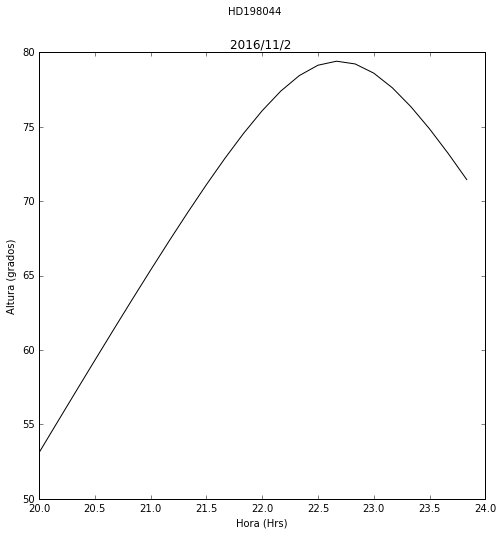

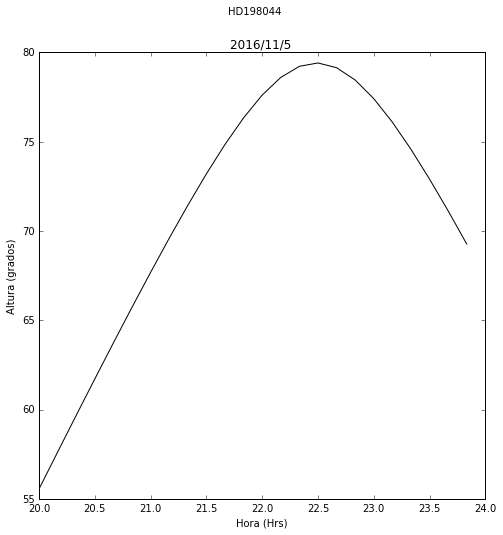

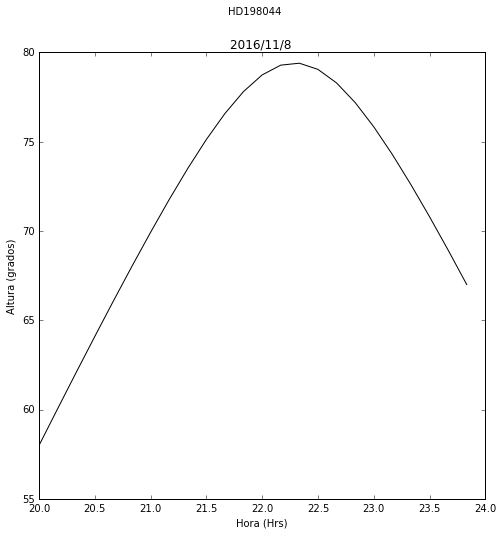

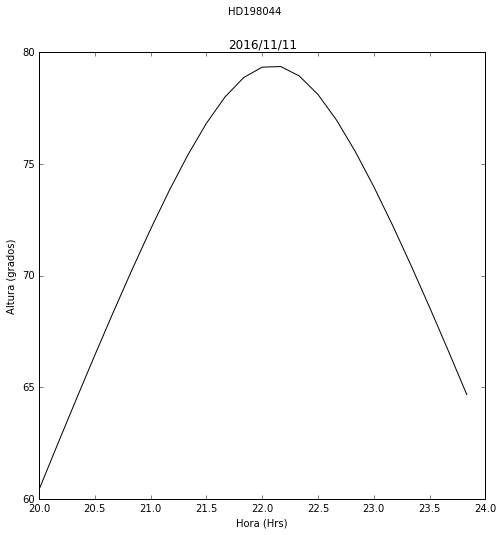

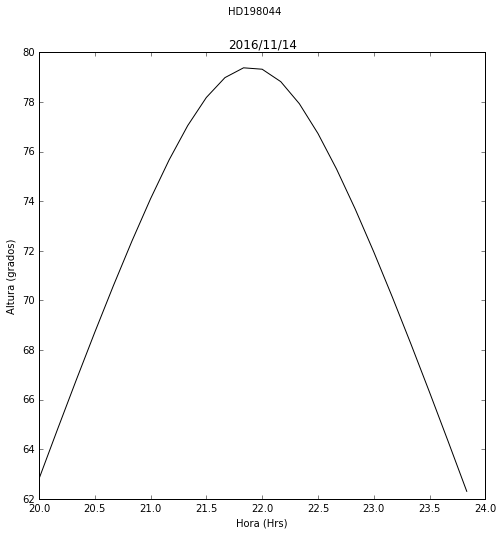

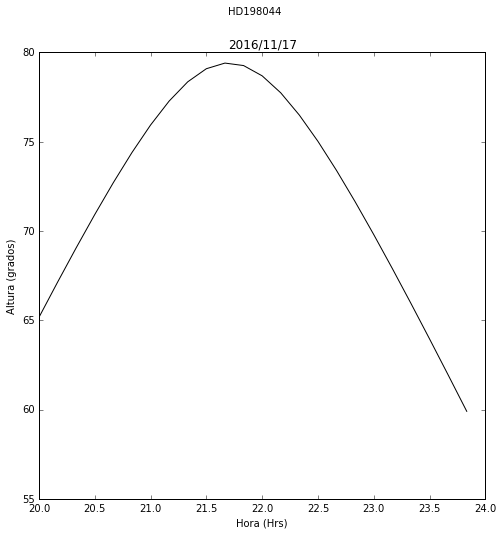

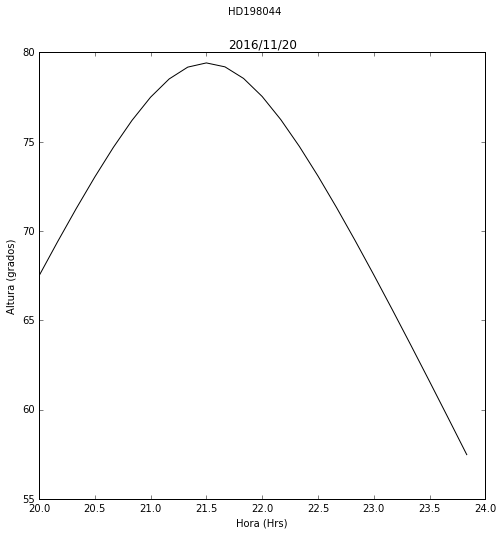

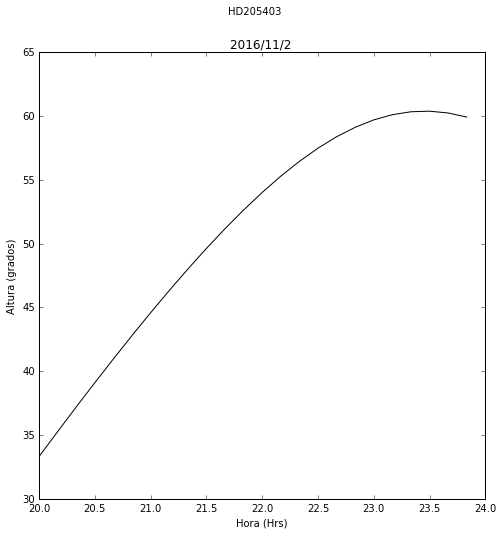

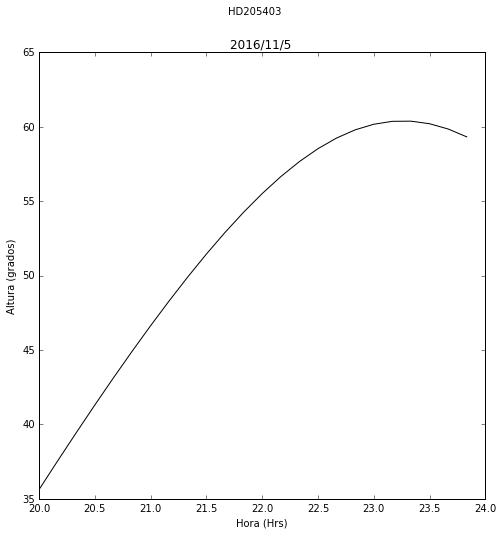

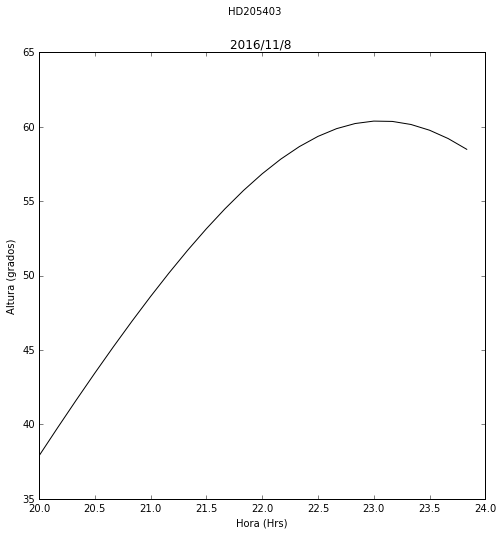

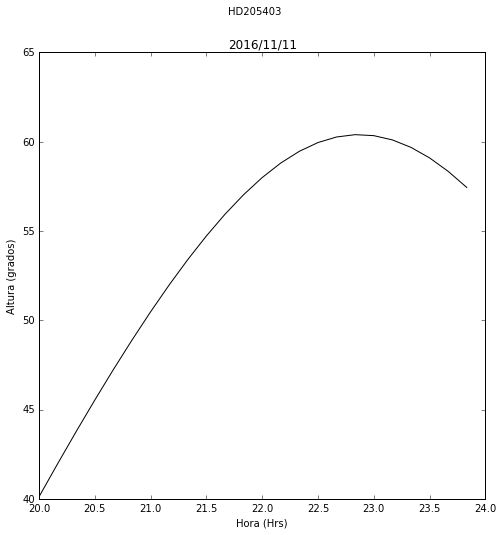

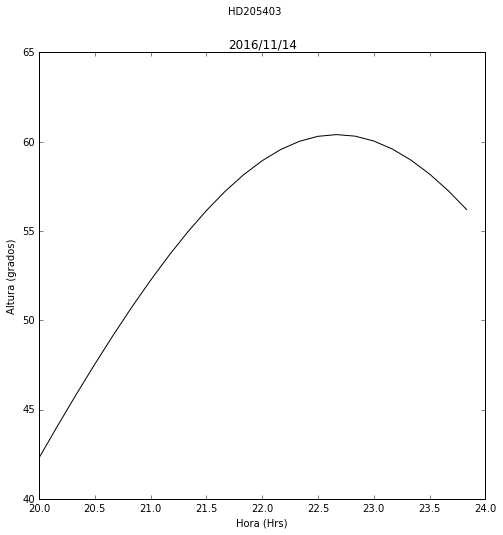

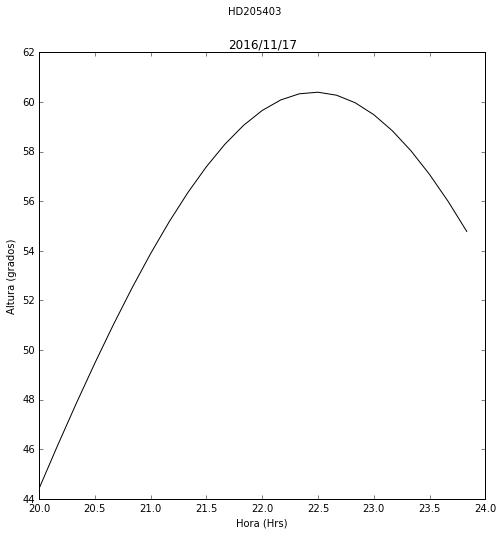

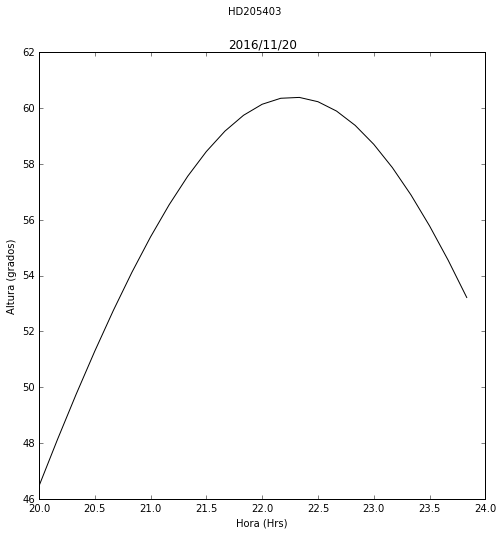

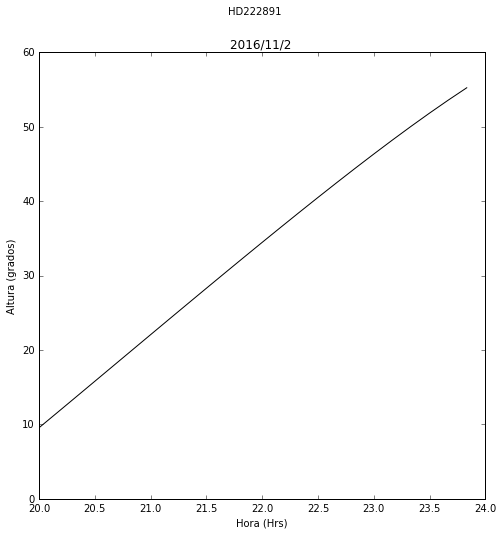

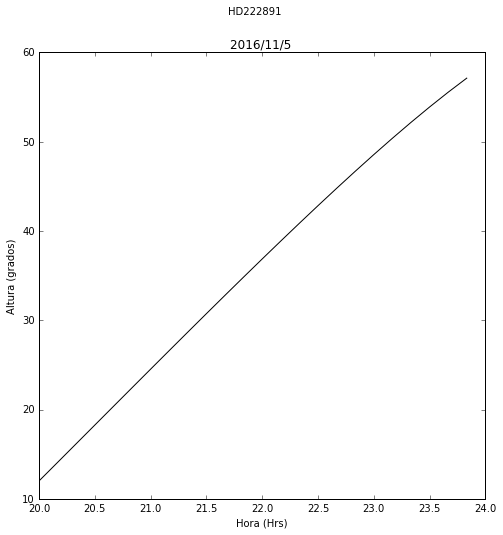

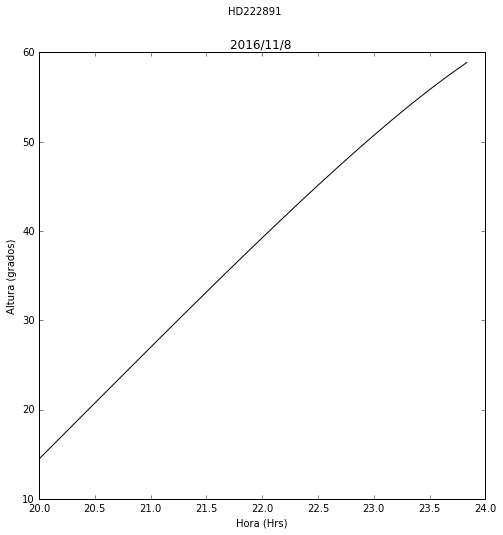

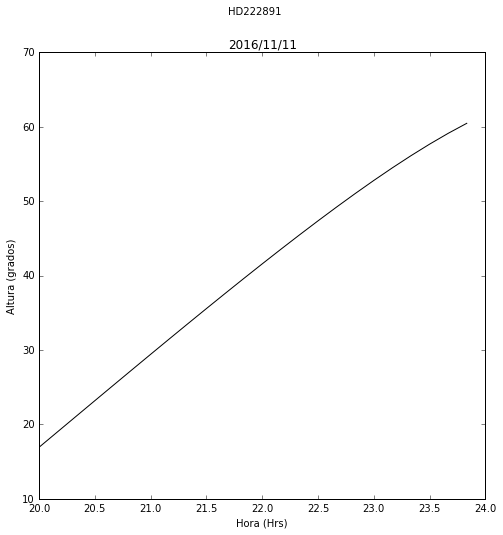

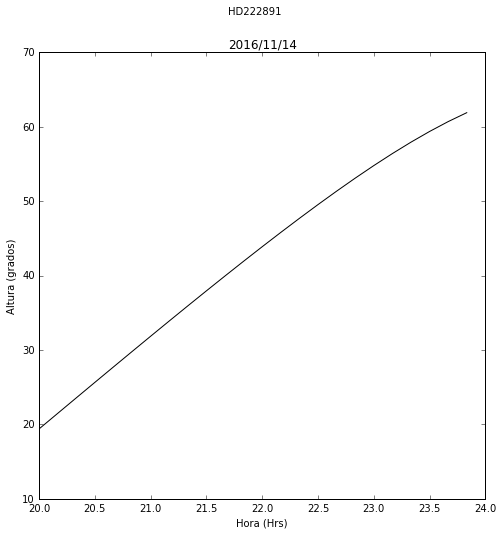

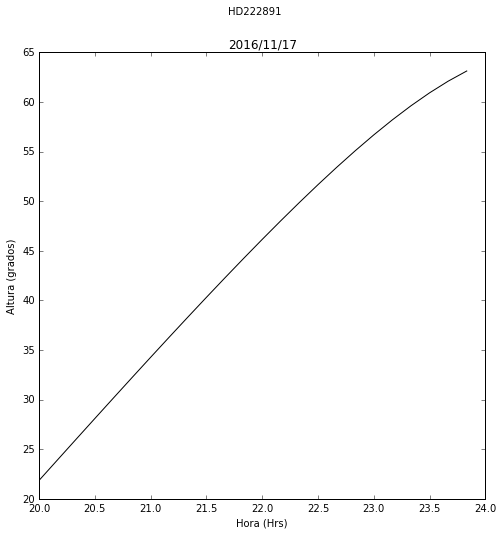

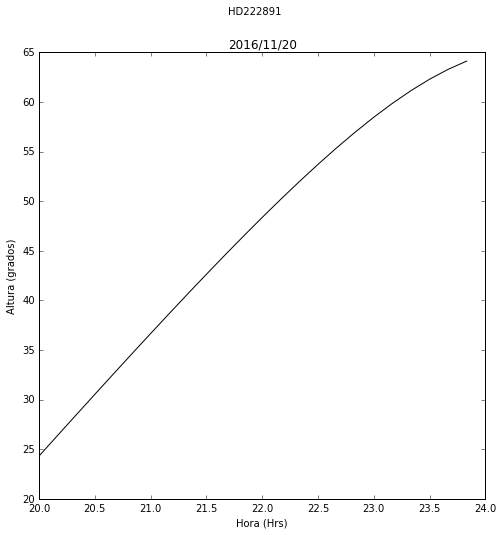

In [4]:
RA = [["312.091","HD198044"],["323.766","HD205403"],["356.162","HD222891"]]
DEC = [["-22.7407","HD198044"],["-3.7349","HD205403"],["-8.84879","HD222891"]]

SantaMartina = ephem.Observer()
SantaMartina.lon =  ephem.degrees('289.4656')
SantaMartina.lat = ephem.degrees('-33.2692')
SantaMartina.elevation = 1450
star = ephem.FixedBody()
for k in range(3): 
    SantaMartina.date = '2016/10/30 19:50:00'
    star._ra = ephem.degrees(RA[k][0])
    star._dec = ephem.degrees(DEC[k][0])
    for i in range(7):
        SantaMartina.date += ephem.hour * 72
        Horas=[]
        Altura=[]
        for j in range(24):
            SantaMartina.date += ephem.minute * 10
            star.compute(SantaMartina)
            SM=str(SantaMartina.date)
            Altura.append(trans(str(star.alt)))
            Horas.append(trans(SM[10:]))
    
        sm=SM[:10]
        SantaMartina.date -= ephem.minute * 10 * 24
        
   
        plt.subplots(figsize=(8,8))
        plt.plot(Horas,Altura,'k')
        plt.suptitle(RA[k][1])
        plt.title(sm)
        plt.xlabel("Hora (Hrs)")
        plt.ylabel("Altura (grados)")
        
        plt.show()


Aquí solo grafiqué algunos días durante estas 3 semanas, en el cual se puede apreciar la visibilidad de estos 3 candidatos que escogí anteriormente. arriba de cada gráfico está indicado el nombre de la candidata y la fecha.

**5)**

La cuadratura es el momento en que una estrella forma un ángulo de 90 grados con otra en la línea de visión (puede ser hacia la derecha o la izquierda). En el caso de una binaria, la estrella secundaria está a 90 grados de la estrella principal, es decir, se encuentran en los puntos más alejados posibles entre ellas. Además, en este punto se encuentra la amplitud máxima de la velocidad radial.

El paper de Wraight et al. (2012), contiene los tiempos en que ocurren los mid-eclipses en Modified Julian Days (MJD), y el periodo de cada una de ellas y su error. Sin embargo, debo obtener las fechas en días calendario en las que ocurren estos suceso. Para esto utilizaré una calculadora (http://ghiorzi.org/diasjuli.htm).

A continuación, una tabla con lo dicho anteriormente.

| Candidato |     MJD       |     Fecha       |     Periodo (días)  |
|:---------:|:-------------:|:---------------:|:-------------------:|
| HD198044  | 54450.509489  |16/Diciembre/2007|    5.15195±0.0015   |
| HD205403  | 54123.634818  | 23/Enero/2007   |    2.4449±0.0005    |  
| HD222891  | 54150.650434  | 19/Febrero/2007 |    1.59495±0.0004   | 


In [5]:
Dia=16.00900000007823 ## aquí fui cambiando los días que obtuve de la calculadora de dias julianos. Para obtener H,M y S.
Hora= (Dia - int(Dia))*24
Minutos= (Hora - int(Hora))*60
Segundos= (Minutos - int(Minutos))*60
print "Fecha en horas del día ", int(Dia), ":", int(Hora),"/",int(Minutos),"/",int(Segundos)

MJD= 2457695 - 2400000
print "MJD: ", MJD

Fecha en horas del día  16 : 0 / 12 / 57
MJD:  57695


La cuadratura va a ocurrir en un cuarto del período ($\frac{Periodo}{4}$), entonces:

In [6]:
import scipy as sp
import math
#from uncertainties import ufloat #numero mas menos error
#from uncertainties.umath import * #multiplica el numero y el error por algun numero

#primer dia de observacion
Noviembre2 = 57695

#candidato HD198044
mjd1 = 54450.509489
#per1 = ufloat(5.15195, 0.0015)
per1 = 5.15195

#cantidad de periodos desde el primer mid-eclipse
cant1 = (Noviembre2-mjd1)/per1
#cant1 = cant1.n
cant1 = int(cant1)
print "**CANDIDATO HD198044**"
print "                      "
print "Cantidad de períodos desde el primer mid-eclipse:", cant1

#para las proximas semanas
obs1 = 21/per1
#obs1 = obs1.n
obs1 = int(obs1)
print "Cantidad de días en los que se podrá observar", obs1

#cuadraturas y mid-eclipses siguientes
ql1, qr1 = [], []

for i in range(1, obs1+1):
    me1 = mjd1+(cant1+i)*per1
    ql1.append(me1-per1/4)
    qr1.append(me1+per1/4)
    print(me1)
#Listas que llevan las cuadraturas en dos momentos. 
print(ql1)
print(qr1)

print "______________________________________________________________________________________"

#candidato HD205403
mjd2 = 54123.634818
#per2 = ufloat(2.4449, 0.0005)
per2 = 2.4449

#cantidad de periodos desde el primer mid-eclipse
cant2 = (Noviembre2-mjd2)/per2
#cant2 = cant2.n
cant2 = int(cant2)
print "**CANDIDATO HD205403**"
print "                      "
print "Cantidad de períodos desde el primer mid-eclipse:", cant2

#para las proximas semanas
obs2 = 21/per2
#obs2 = obs2.n
obs2 = int(obs2)
print "Cantidad de días en los que se podrá observar", obs2

#cuadraturas y mid-eclipses siguientes
ql2, qr2 = [], []

for i in range(1, obs2+1):
    me2 = mjd2+(cant2+i)*per2
    ql2.append(me2-per2/4)
    qr2.append(me2+per2/4)
    print(me2)
print(ql2)
print(qr2)

print "______________________________________________________________________________________"

#candidato HD222891
mjd3 = 54150.650434
#per3 = ufloat(1.59495, 0.0004)
per3 = 1.59495

#cantidad de periodos desde el primer mid-eclipse
cant3 = (Noviembre2-mjd3)/per3
#cant3 = cant3.n
cant3 = int(cant3)
print("**CANDIDATO HD222891**")
print "                      "
print "Cantidad de períodos desde el primer mid-eclipse:", cant3

#para las proximas semanas
obs3 = 21/per3
#obs3 = obs3.n
obs3 = int(obs3)
print "Cantidad de días en los que se podrá observar", obs3

#cuadraturas y mid-eclipses siguientes
ql3, qr3 = [], []

for i in range(1, obs3+1):
    me3 = mjd3+(cant3+i)*per3
    ql3.append(me3-per3/4)
    qr3.append(me3+per3/4)
    print(me3)
print(ql3)
print(qr3)

print "______________________________________________________________________________________"

**CANDIDATO HD198044**
                      
Cantidad de períodos desde el primer mid-eclipse: 629
Cantidad de días en los que se podrá observar 4
57696.237989
57701.389939
57706.541889
57711.693839
[57694.950001499994, 57700.10195149999, 57705.2539015, 57710.4058515]
[57697.525976499994, 57702.67792649999, 57707.8298765, 57712.9818265]
______________________________________________________________________________________
**CANDIDATO HD205403**
                      
Cantidad de períodos desde el primer mid-eclipse: 1460
Cantidad de días en los que se podrá observar 8
57695.633718
57698.078618
57700.523518
57702.968418
57705.413318
57707.858218
57710.303118
57712.748018
[57695.022493, 57697.467393, 57699.912293, 57702.357192999996, 57704.802093, 57707.246993, 57709.691892999996, 57712.136793]
[57696.244943, 57698.689843, 57701.134743, 57703.579643, 57706.024543, 57708.469443, 57710.914343, 57713.359243]
__________________________________________________________________________________

**6)** La función de masas para estrellas binarias es $$\frac{4\pi^2}{G}\frac{(a sin(i))^3}{P^2} = \frac{(m_2 sin(i))^3}{(m_1+m_2)^2}$$ donde $G$ es la constante de gravitación universal, $a$ es el semi-eje mayor, $sin(i)$ es la inclinación de la órbita, $P$ el periodo, y $m_1$ y $m_2$ las masas de la estrella principal y secundaria, respectivamente. Ahora, si asumimos que la inclinación es de 90 grados, la ecuación se simplifica bastante: $$\frac{4\pi^2}{G P^2} = \frac{(m_2)^3}{(m_1+m_2)^2}$$ Por otro lado, usando ley de Kepler para órbitas circulares, tenemos que $$a_2 = \frac{m_1}{m_1+m_2}a$$ Ahora, aplicando la ley de Newton, asumiendo una órbita circular para $m_2$, tenemos que el periodo es: $$P = \frac{2\pi}{\Omega}$$ donde $\Omega = \sqrt{\frac{G(m_1+m_2)}{a^3}}$. Además las velocidades son constantes alrededor de la órbita: $P v_1 = 2\pi a_1$ y $P v_2 = 2\pi a_2$. La razón entre las velocidades radiales máximas observadas es: $$\frac{v_2 sin(i)}{v_1 sin(i)} = \frac{a_2}{a_1} = \frac{m_1}{m_2}$$ Para encontrar la suma de las masas, notamos que $a = a_1+a_2 = \frac{P}{2\pi}(v_1+v_2)$, y usando ley de Kepler de nuevo: $$P^2 = \frac{4\pi^2 a^3}{G(m_1+m_2)} = \frac{P^3(v_1+v_2)^3}{2\pi G(m_1+m_2)}$$ Finalmente: $$m_1+m_2 = \frac{P(v_1+v_2)^3}{2\pi G}$$ Y asumiendo que no alcanzamos a detectar el movimiento de la estrella secundaria ($v_2 = 0$), entonces nos queda: $$m_1+m_2 = \frac{P(v_1)^3}{2\pi G}$$ donde podemos fijar $m_1$ para ver cómo varía la amplitud de la velocidad radial en función de la masa de la estrella secundaria. Pero además: $\frac{m_1}{m_2} = \frac{v_{2r}}{v_{1r}}$, reemplazándolo en $(m_1+m_2) = \frac{P(v_{1r}+v_{2r})^3}{2\pi G}$, finalmente llegamos a: $$\frac{(m_1)^3}{(m_1+m_2)^2} = \frac{P (v_1)^3}{2\pi G}$$

Fuente:
>http://astronomy.swin.edu.au/cosmos/B/Binary+Mass+Function

>http://www.astro.caltech.edu/~george/ay20/Ay20-Lec4x.pdf 

>http://www.physics.usu.edu/shane/classes/astrophysics/lectures/lec08_binaries.pdf

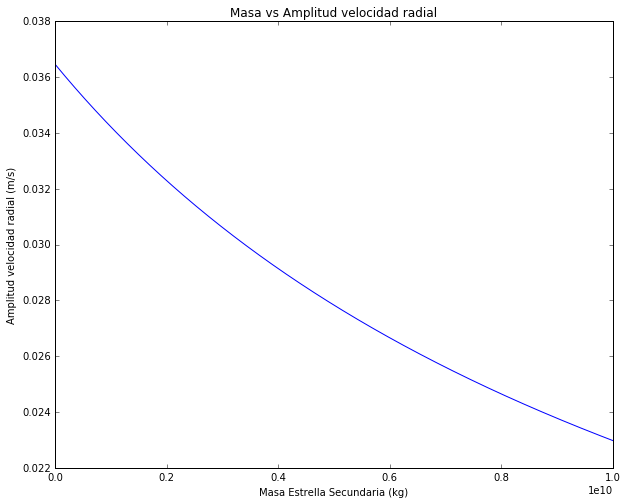

In [7]:
#definimos constantes
pi = 3.1415926
G = 6.67*(10**(-11)) #N*m^2/kg^2

#m1 y P fijos
m1 = 10**10
p = 86400 #un dia en segundos

m2 = np.arange(0, m1, 1000)
a = np.divide(2*pi*G, p)
#print(a)
b = 1.0/3.0
#print(b)
a1 = pow(a, b)
#print(a1)
c = 2.0/3.0
d = pow((m1+m2), c)
#print(d)

f = np.divide(m1, d)
v1 = np.multiply(f, a1)

plt.subplots(figsize=(10,8))
plt.plot(m2, v1)
plt.title("Masa vs Amplitud velocidad radial")
plt.xlabel("Masa Estrella Secundaria (kg)")
plt.ylabel("Amplitud velocidad radial (m/s)")
plt.show()

De acá vemos claramente, que al aumentar la masa de la estrella secundaria, la velocidad radial de la compañera principal, disminuye rápidamente.

En la secuencia principal, la relación radio/masa es de la forma $R \propto M^{3/4}$. Por lo tanto, usando ésto y los datos sobre los candidatos presentados en el paper de Wraight et. al (2012), podemos calcular la amplitud de la velocidad radial para cada candidato y las masas de ambas estrellas:

In [8]:
#definimos constantes
pi = 3.1415926
G = 6.67*(10**(-11)) #N*m^2/kg^2
prop = 4.0/3.0 #potencia que relaciona masa-radio

#datos Sol
ro = 6.96*(10**8) #m
mo = 1.98*(10**(30)) #kg

#h: estrella principal (host)
#c: estrella secundaria (companion)

#HD198044
print "HD198044:"
print "__________________________________________________________"

p1 = 5.15195
rh1 = 1.46
rc1 = 0.34

mh1 = (rh1)**(prop)
mc1 = (rc1)**(prop)

print "Masa estrella principal:", mh1
print "Masa estrella secundaria:", mc1


#transformamos las unidades
p1 = p1*86400 #segundos
mh1 = mh1*mo
mc1 = mc1*mo #masas solares


#utilizamos la formula del codigo anterior aplicado a los candidatos
a1 = np.divide((mh1)**3,(mh1+mc1)**2)
b1 = np.divide(2*pi*G,p1)
c1 = np.multiply(a1, b1)
amp1 = (c1)**(1.0/3.0)
#print(amp1) #m/s
amp1 = np.divide(amp1, 1000)
print "RV estrella principal (amplitud):", amp1


#HD205403
print "   "
print "HD205403:"
print "__________________________________________________________"

p2 = 2.4449
rh2 = 1.46
rc2 = 0.35

mh2 = (rh2)**(prop)
mc2 = (rc2)**(prop)

print "Masa estrella principal:", mh2
print "Masa estrella secundaria:", mc2

#transformamos las unidades
p2 = p2*86400 #segundos
mh2 = mh2*mo
mc2 = mc2*mo #masas solares

a2 = np.divide((mh2)**3,(mh2+mc2)**2)
b2 = np.divide(2*pi*G,p2)
c2 = np.multiply(a2, b2)
amp2 = (c2)**(1.0/3.0)
#print(amp1) #m/s
amp2 = np.divide(amp2, 1000)
print "RV estrella principal (amplitud):", amp2 
print "   "

#HD222891
print "HD222891:"
print "__________________________________________________________"

p3 = 1.59495
rh3 = 1.80
rc3 = 0.36

mh3 = (rh3)**(prop)
mc3 = (rc3)**(prop)

print "Masa estrella principal:", mh3
print "Masa estrella secundaria:", mc3

#transformamos las unidades
p3 = p3*86400 #segundos
mh3 = mh3*mo
mc3 = mc3*mo #masas solares

a3 = np.divide((mh3)**3,(mh3+mc3)**2)
b3 = np.divide(2*pi*G,p3)
c3 = np.multiply(a3, b3)
amp3 = (c3)**(1.0/3.0)
#print(amp1) #m/s
amp3 = np.divide(amp3, 1000)
print "RV estrella principal (amplitud):", amp3


HD198044:
__________________________________________________________
Masa estrella principal: 1.6562929033
Masa estrella secundaria: 0.237304089595
RV estrella principal (amplitud): 133.18048903
   
HD205403:
__________________________________________________________
Masa estrella principal: 1.6562929033
Masa estrella secundaria: 0.246655455622
RV estrella principal (amplitud): 170.183644495
   
HD222891:
__________________________________________________________
Masa estrella principal: 2.18959271841
Masa estrella secundaria: 0.256096317923
RV estrella principal (amplitud): 219.448460725


Notar que los radios y las masa están expresados en unidades solares, mientras que la amplitud de la velocidad radial está expresada en km/seg.

Del paper sobre PUCHEROS (Vanzi et. al. (2012)), nos dice que el límite de magnitudes es V=9, y los candidatos tienen magnitudes V=7.2 (HD198044), V=8.02 (HD205403) y V=8.07 (HD222891), por lo que son más brillantes que V=9 y por ese lado sí podrán ser detectados. Además, los "shifts" de PUCHEROS de las velocidades radiales son de unos pocos km/s, y las amplitudes encontradas para los candidatos son del orden de $10^2$ km/s, por lo tanto una pequeña variación no afectará en su detección.

Fuentes:
>http://mnras.oxfordjournals.org/content/424/4/2770.full.pdf


**7)** Primero, usando la relación entre magnitud y flujo de una estrella $m=−2.5log(F)+K$, podemos obtener el flujo aproximado para cada candidato: para HD198044, F=0.00131; para HD205403, F=0.00062; y para HD222891, F=0.00059. Para una magnitud V=3.5 (F=0.0398), y obtener una precisión de 10 m/s se requieren 300 segundos, por lo que para obtener una precisión de 100 m/s para un objeto de V=3.5, se necesitan 30 seg de exposición, ya que si aumentamos la precisión requerida, el error podemos obtener es mayor, y así el tiempo de exposición que necesitaremos será menor. Pero como el tiempo de exposición necesario es inversamente proporcional al flujo, utilizamos una regla de tres inversa simple para calcular el tiempo de exposición que necesitaremos para cada candidato, así: para HD198044, necesitamos 91.145 seg (1.519 mins); para HD205403, 1925.81 seg (32.097 mins); y para HD222891, 2023.73 seg (33.73 mins).

Partiendo por el último punto, como el primer candidato seleccionado de entre los 9 iniciales (HD198044) en un principio requiere menor tiempo de exposición, tendrá una mayor prioridad. La prioridad entre los otros dos candidatos (HD205403 y HD222891), dependerá de las cuadraturas durante las primeras horas de la noche. HD222891 presenta 9 cuadraturas durante las primeras horas de la noche en los puntos máximos y mínimos de la amplitud de la velocidad, es decir, las estrellas estarán eclipsándose en esos momentos, mientras que HD205403 presenta sólo 5, por lo tanto, la segunda prioridad será para HD205403. 

PD: las cuadraturas ocurren cuando las estrellas no están eclipsadas, es decir cuando los puntos de las amplitudes de la velocidad no son ni máximos ni mínimos, es por ésto que queremos observar las estrellas cuando no se encuentren en esos puntos. Los puntos de colores graficados anteriormente corresponden simplemente a cuando observaremos a los candidatos en las primeras horas de la noche, por lo tanto, mientras más puntos se encuentren cerca de los máximos o mínimos de la onda sinusoidal, entonces esos candidatos perderán prioridad para ser observados. 